In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [64]:
df = pd.read_csv('kc_house_data.csv', index_col = 0)
df['yr_renovated']= df['yr_renovated'].fillna(0)
df = df.drop(['zipcode', 'waterfront', 'view', 'sqft_above'], axis = 1)
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['sqft_basement']= df['sqft_basement'].replace('?').astype(float)
df['has_basement'] = np.where(df['sqft_basement']!= 0, True, False)
df = df.assign(season=lambda x: x["date"].apply(lambda s: ["winter","spring","summer","fall"][(s.month-1)//3]))
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,has_basement,season
id,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,0.0,1955,0.0,47.5112,-122.257,1340,5650,10,False,fall
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,400.0,1951,1991.0,47.7210,-122.319,1690,7639,12,True,fall
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,0.0,1933,0.0,47.7379,-122.233,2720,8062,2,False,winter
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,910.0,1965,0.0,47.5208,-122.393,1360,5000,12,True,fall
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,0.0,1987,0.0,47.6168,-122.045,1800,7503,2,False,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,3,8,0.0,2009,0.0,47.6993,-122.346,1530,1509,5,False,spring
6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,3,8,0.0,2014,0.0,47.5107,-122.362,1830,7200,2,False,winter
1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,3,7,0.0,2009,0.0,47.5944,-122.299,1020,2007,6,False,spring


In [67]:
df['bathrooms'].std()

0.7689842966527209

In [65]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [51]:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [ ]:
discrete_features = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'is_renovated']

In [ ]:
for feature

In [43]:
df['sqft_basement'].value_counts()

0.0       13093
600.0       222
500.0       217
700.0       210
800.0       206
          ...  
2360.0        1
2196.0        1
1770.0        1
2570.0        1
2300.0        1
Name: sqft_basement, Length: 303, dtype: int64

In [14]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1970.999676,68.758207,47.560093,-122.213982,1986.620318,12758.283512,6.573969
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,29.375234,364.037499,0.138552,0.140724,685.230472,27274.441950,3.115061
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1951.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,4.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1975.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,6.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000


In [19]:
df['sqft_living'].quantile(.9)

3254.0000000000146

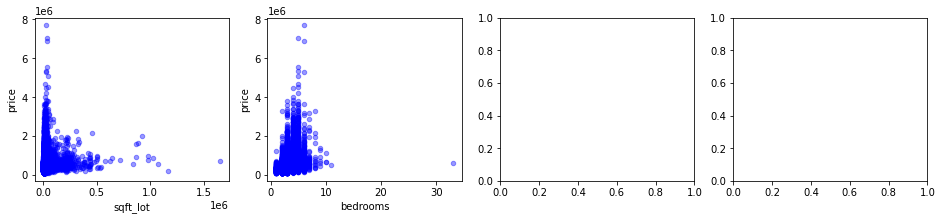

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 3))

for xcol, ax in zip(['sqft_lot', 'bedrooms'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [4]:
price_corrs = df.corr()["price"].map(abs).sort_values(ascending=False)
price_corrs

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.117855
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
month            0.009928
Name: price, dtype: float64

In [5]:
df_corr = df.drop(['floors', 'yr_renovated'], axis=1)

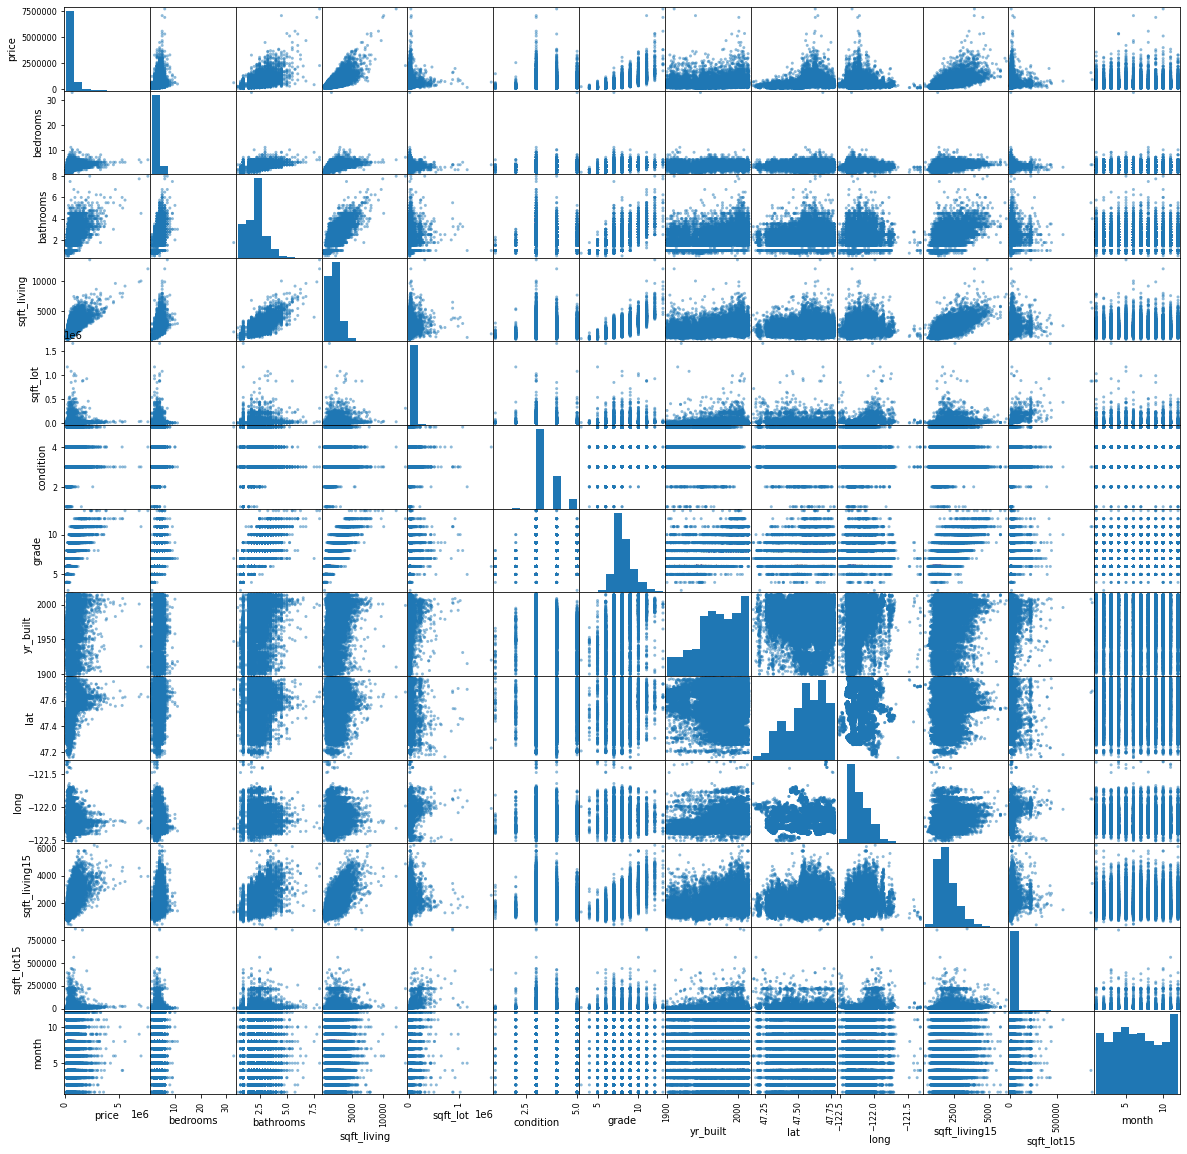

In [6]:
pd.plotting.scatter_matrix(df_corr,figsize  = [20, 20]);
plt.show()

In [ ]:
df['']

In [7]:
df['date'].value_counts()

2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2014-07-27      1
2015-03-08      1
2014-11-02      1
2015-05-15      1
2015-05-24      1
Name: date, Length: 372, dtype: int64

In [8]:
df['yr_renovated'].value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [9]:
df.groupby(['sqft_lot', 'bedrooms'])['price'].mean()

sqft_lot  bedrooms
520       4            700000.0
572       3            250000.0
600       2            367500.0
609       2           1230000.0
635       2            256950.0
                        ...    
982998    4            998000.0
1024068   4            855000.0
1074218   5            542500.0
1164794   2            190000.0
1651359   4            700000.0
Name: price, Length: 13276, dtype: float64

In [10]:
df['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
y = df['price']
X = df.drop(['price'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


In [13]:
df['price'].mean()

540296.5735055795

In [70]:
upper_limit = np.mean(df['sqft_living'])+3*np.std(df['sqft_living'])
lower_limit = np.mean(df['sqft_living'])-3*np.std(df['sqft_living'])

In [71]:
def outlier_limits(col):
    upper_limit = np.mean(col)+3*np.std(col)
    lower_limit = np.mean(col)-3*np.std(col)
    return lower_limit, upper_limit

In [76]:
def lower_limit(col):
    lower_limit = np.mean(col)-3*np.std(col)
    return lower_limit

In [75]:
def upper_limit(col):
    upper_limit = np.mean(col)+3*np.std(col)
    return upper_limit

In [88]:
def between_range(col):
    bool_col = col.between(lower_limit(col),upper_limit(col))
    return bool_col

In [81]:
def filter_column(df, bool_col):
    df[filtered_col]=df[df[bool_col]==True]
    return df

In [89]:
between_range==True

False

In [72]:
outlier_limits(df['sqft_living'])

(-673.9327580188888, 4834.576458532849)

In [74]:
data['sqft_living'].between(outlier_limits)

NameError: name 'data' is not defined

In [ ]:
def between_range(col):
    col.between(lower_limit)